<div style="text-align:center; font-weight:bold; color:black; font-size:30px; font-family:Georgia, serif;">American Airlines Tweets Analysis</div>


<div style="text-align: center;">
    <img src="https://i.pinimg.com/originals/38/c9/e5/38c9e5cf69f7e1fbb31463e63839de2e.jpg" alt="Image 2" width="600"/>
</div>


# Reading The Dataset

In [70]:
import pandas as pd

# Read the CSV file
tweets = pd.read_csv('Tweets.csv', index_col='tweet_id', parse_dates=['tweet_created'])
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada)


# tweets check 

In [41]:
def avg_word_length(x):
    words=x.split()
    word_lengths = [len(words) for word in words]
    avg_word_length = sum(word_lengths)/len(words)
    return (avg_word_length)


In [42]:
def hashtag_count(str):
    words = str.split()
    hashtags = [word for word in words if word.startswith('#')]
    return len(hashtags)

In [43]:
def mention_count(str):
    words = str.split()
    mentions = [word for word in words if word.startswith('@')]
    return len(mentions)

In [44]:
df = pd.DataFrame({'text':tweets['text']
                   ,'num_chars':tweets['text'].apply(len)
                   ,'avg_words_length':tweets['text'].apply(avg_word_length)
                  ,'hashtags_count':tweets['text'].apply(hashtag_count)
                  ,'mentions_count':tweets['text'].apply(mention_count)})
df

,text,num_chars,avg_words_length,hashtags_count,mentions_count
tweet_id,,,,,
570306133677760513,@VirginAmerica What @dhepburn said.,35,4.0,0,2
570301130888122368,@VirginAmerica plus you've added commercials t...,72,9.0,0,1
570301083672813571,@VirginAmerica I didn't today... Must mean I n...,71,12.0,0,1
570301031407624196,@VirginAmerica it's really aggressive to blast...,126,17.0,0,1
570300817074462722,@VirginAmerica and it's a really big bad thing...,55,10.0,0,1
...,...,...,...,...,...
569587686496825344,@AmericanAir thank you we got on a different f...,63,11.0,0,1
569587371693355008,@AmericanAir leaving over 20 minutes Late Flig...,150,23.0,0,1
569587242672398336,@AmericanAir Please bring American Airlines to...,60,7.0,1,1


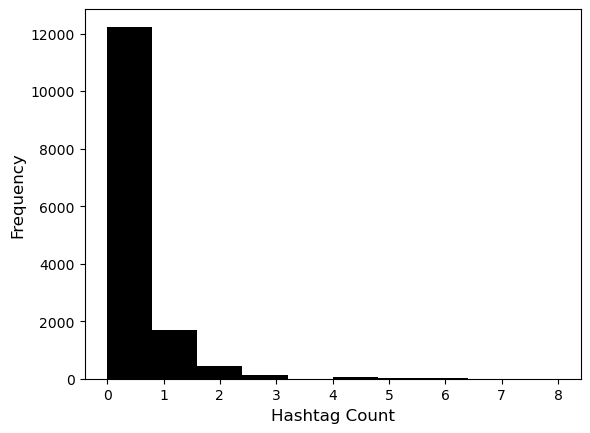

In [45]:
import matplotlib.pyplot as plt

# Calculate hashtag counts
df['hashtags_count'] = tweets['text'].apply(hashtag_count)

# Plot the histogram with specified font size and color
plt.hist(df['hashtags_count'], color='black')

# Set the font size of the x-axis and y-axis labels
plt.xlabel('Hashtag Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set the font size of the x-axis and y-axis tick labels
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10) 

# Show the plot
plt.show()


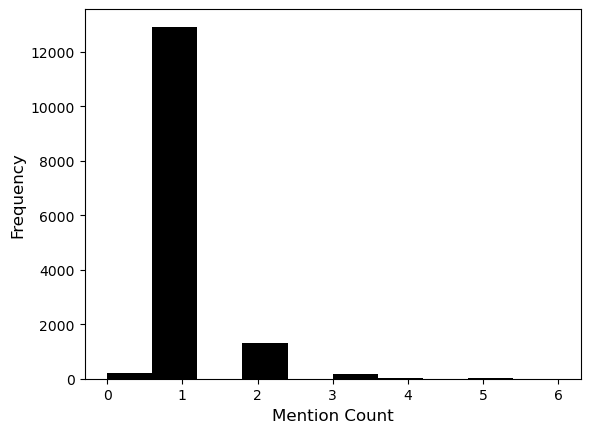

In [46]:
import matplotlib.pyplot as plt

# Calculate mention counts
df['mentions_count'] = tweets['text'].apply(mention_count)

# Plot the histogram with specified font size and color
plt.hist(df['mentions_count'], color='black')

# Set the font size of the x-axis and y-axis labels
plt.xlabel('Mention Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set the font size of the x-axis and y-axis tick labels
plt.tick_params(axis='x', labelsize=10)  
plt.tick_params(axis='y', labelsize=10)  

# Show the plot
plt.show()


# Convert every Texts on the  text col  to text

In [71]:
text = ' '.join(tweets.text) 
text[:2000] # 2000 chrs

'@VirginAmerica What @dhepburn said. @VirginAmerica plus you\'ve added commercials to the experience... tacky. @VirginAmerica I didn\'t today... Must mean I need to take another trip! @VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse @VirginAmerica and it\'s a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :) @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP @virginamerica Well, I didn\'t…but NOW I DO! :-D @VirginAmerica it was amazing, and arrived an hour early. You\'re too good to me. @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24 @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconogr

# Text Preprocessing

## Remove the emojis

In [72]:
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

tweets['text'] = tweets['text'].apply(remove_emojis)

text_without_emojis = remove_emojis(text)
text_without_emojis[:2000]


'@VirginAmerica What @dhepburn said. @VirginAmerica plus you\'ve added commercials to the experience... tacky. @VirginAmerica I didn\'t today... Must mean I need to take another trip! @VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse @VirginAmerica and it\'s a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :) @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP @virginamerica Well, I didn\'t…but NOW I DO! :-D @VirginAmerica it was amazing, and arrived an hour early. You\'re too good to me. @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24 @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconogr

## Remove links

In [73]:
import re

def remove_links(text):
    # Define the regular expression pattern to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    
    # Use the sub() method to replace URLs with an empty string
    return url_pattern.sub('', text)


tweets['text'] = tweets['text'].apply(remove_links)

text_without_links = remove_links(text_without_emojis)
text_without_links[:2000]


'@VirginAmerica What @dhepburn said. @VirginAmerica plus you\'ve added commercials to the experience... tacky. @VirginAmerica I didn\'t today... Must mean I need to take another trip! @VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse @VirginAmerica and it\'s a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :) @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there.  @virginamerica Well, I didn\'t…but NOW I DO! :-D @VirginAmerica it was amazing, and arrived an hour early. You\'re too good to me. @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24 @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D @VirginAmerica

## Remove hashtags and mentions

In [74]:
import re

def remove_hashtags_mentions(text):
    # Define the regular expression patterns to match hashtags and mentions
    hashtag_pattern = re.compile(r'#\w+')
    mention_pattern = re.compile(r'@\w+')
    
    # Use the sub() method to replace hashtags and mentions with an empty string
    text_without_hashtags = hashtag_pattern.sub('', text)
    text_without_mentions = mention_pattern.sub('', text_without_hashtags)
    
    return text_without_mentions

tweets['text'] = tweets['text'].apply(remove_hashtags_mentions)


text_without_hashtags_mentions = remove_hashtags_mentions(text_without_links)
text_without_hashtags_mentions[:2000]


' What  said.  plus you\'ve added commercials to the experience... tacky.  I didn\'t today... Must mean I need to take another trip!  it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse  and it\'s a really big bad thing about it  seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA  yes, nearly every time I fly VX this “ear worm” won’t go away :)  Really missed a prime opportunity for Men Without Hats parody, there.   Well, I didn\'t…but NOW I DO! :-D  it was amazing, and arrived an hour early. You\'re too good to me.  did you know that suicide is the second leading cause of death among teens 10-24  I &lt;3 pretty graphics. so much better than minimal iconography. :D  This is such a great deal! Already thinking about my 2nd trip to  &amp; I haven\'t even gone on my 1st trip yet! ;p   I\'m flying your   skies again! U take all the  away from travel   Thank

## Remove  punctuations

In [75]:
import re

def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Select only alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    return text

tweets['text'] = tweets['text'].apply(preprocess_text)

processed_text = preprocess_text(text_without_hashtags_mentions)
processed_text[:2000]


' what  said  plus youve added commercials to the experience tacky  i didnt today must mean i need to take another trip  its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse  and its a really big bad thing about it  seriously would pay  a flight for seats that didnt have this playing\nits really the only bad thing about flying va  yes nearly every time i fly vx this ear worm wont go away   really missed a prime opportunity for men without hats parody there   well i didntbut now i do d  it was amazing and arrived an hour early youre too good to me  did you know that suicide is the second leading cause of death among teens   i lt pretty graphics so much better than minimal iconography d  this is such a great deal already thinking about my nd trip to  amp i havent even gone on my st trip yet p   im flying your   skies again u take all the  away from travel   thanks  sfopdx schedule is still mia  so excited for my first cross country fli

## Remove stopwords

In [76]:
import nltk
from nltk.corpus import stopwords
def remove_stopwords(text, language='english'):
    stop_words = set(stopwords.words(language))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)


tweets['text'] = tweets['text'].apply(remove_stopwords)

processed_text = remove_stopwords(processed_text)
processed_text[:2000]


'said plus youve added commercials experience tacky didnt today must mean need take another trip really aggressive blast obnoxious entertainment guests faces amp little recourse really big bad thing seriously would pay flight seats didnt playing really bad thing flying va yes nearly every time fly vx ear worm wont go away really missed prime opportunity men without hats parody well didntbut amazing arrived hour early youre good know suicide second leading cause death among teens lt pretty graphics much better minimal iconography great deal already thinking nd trip amp havent even gone st trip yet p im flying skies u take away travel thanks sfopdx schedule still mia excited first cross country flight lax mco ive heard nothing great things virgin america flew nyc sfo last week couldnt fully sit seat due two large gentleman either side help flying know would amazingly awesome bosfll please want fly first fares may three times carriers seats available select love graphic love hipster innov

## Replace abbreviations

In [77]:
import re
import pandas as pd

def preprocess_text(text):
    # Define common abbreviations and their full forms
    abbreviations = {
        "amp": "and",
        "coz": "because",
        "gt": "great",
        "lol": "laugh out loud",
        "btw": "by the way",
        "plz": "please",
        "wtf": "what the f***",
        "thx": "thanks",
        "yr": "year",
        "atm": "at the moment",
        "omg": "oh my god",
        "dca": "Washington National Airport",
        "phl": "Philadelphia International Airport",
        "sxsw": "South by Southwest",
        "tx": "Texas",
        "ny": "New York",
        "bos": "Boston",
        "lga": "LaGuardia Airport",
        "app": "application",  
        "cs": "customer service",  
        "faq": "frequently asked questions",  
        "fll": "Fort Lauderdale-Hollywood International Airport",  
        "dms": "direct messages",  
        "msg": "message",  
        "tel": "telephone",  
        "hr": "hour",  
        "min": "minute",  
        "sec": "second",
         'dm': 'Direct Messag',
        "ct": "Central Time (timezone)",
        "ctg": "Confirmation number",
        "re": 'Regarding',
        "im": "I am",
        "feb": "February",
         "cancelled flighted": "Flight cancellation",
         "ua": "United Airlines",
         "us": "United States",
        "bag": "Baggage",
        "h": "Hour",
        "ans": "Answer",
        "thx": "Thanks",
        "mqxc": "Reservation",
        "mpwnc": "identifier",
        "cv": "resume",
        "ua": "United Airlines",
        "hrs": "Hours",
        "tkt": "Ticket",
        "pls": "please",
        "im": "I'm",
       "dont": "don't",
        "havent": "haven't",
        "p": "pretty",
        "yrs": "years",
       "atm": "at the moment",
        "bday": "birthday",
        "dal": "Dallas Love Field",
        "w/" :"with",
        "tix" :"tickets",
        "info":"information",
        "k":"okay",
        "th": "thanks",
        "im": "I'm",
        "wth":"What the heck",
        "flt":"Flight",
        "tel": "Telephone",
        "pax" :"Passengers",
        "xmas": "Christmas",
        "min" :"Minutes",
        "phn":"Phone",
        "mgr" : "manager",
        "inc" :"including",
        "wks" : "weeks",
        "lbs":"pounds",
        "b" : "be",
        "ppl": "people",
        "ap" : "Airplane",
        "bw" :"between",
        'u':'You',
        'xoxo': "hugs and kisses"
        
        
    }
    
    # Create a regular expression pattern to match all abbreviations
    pattern = re.compile(r'\b(?:%s)\b' % '|'.join(abbreviations.keys()), re.IGNORECASE)
    
    # Replace abbreviations with their full forms
    text = pattern.sub(lambda x: abbreviations[x.group().lower()], text)
    
    return text
# Preprocess the text column
tweets['text'] = tweets['text'].apply(preprocess_text)

processed_text = preprocess_text(processed_text)
processed_text[:2000]


"said plus youve added commercials experience tacky didnt today must mean need take another trip really aggressive blast obnoxious entertainment guests faces and little recourse really big bad thing seriously would pay flight seats didnt playing really bad thing flying va yes nearly every time fly vx ear worm wont go away really missed prime opportunity men without hats parody well didntbut amazing arrived hour early youre good know suicide second leading cause death among teens lt pretty graphics much better minimal iconography great deal already thinking nd trip and haven't even gone st trip yet pretty I'm flying skies You take away travel thanks sfopdx schedule still mia excited first cross country flight lax mco ive heard nothing great things virgin america flew nyc sfo last week couldnt fully sit seat due two large gentleman either side help flying know would amazingly awesome bosfll please want fly first fares may three times carriers seats available select love graphic love hips

## Lemmatization based on the part of speech

In [78]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    
    # Tokenize text
    tokens = word_tokenize(text)
    
     # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    
    # Lemmatize tokens based on POS tags
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for token, pos_tag in tagged_tokens:
        if pos_tag.startswith('N'):  # Noun
            lemmatized_tokens.append(lemmatizer.lemmatize(token, pos='n'))
        elif pos_tag.startswith('V'):  # Verb
            lemmatized_tokens.append(lemmatizer.lemmatize(token, pos='v'))
        elif pos_tag.startswith('J'):  # Adjective
            lemmatized_tokens.append(lemmatizer.lemmatize(token, pos='a'))
        elif pos_tag.startswith('R'):  # Adverb
            lemmatized_tokens.append(lemmatizer.lemmatize(token, pos='r'))
        else:
            lemmatized_tokens.append(token)
    
    # Join tokens back into text
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

tweets['text'] = tweets['text'].apply(preprocess_text)


processed_text = preprocess_text(processed_text)
processed_text[:2000]

"say plus youve added commercial experience tacky didnt today must mean need take another trip really aggressive blast obnoxious entertainment guest face and little recourse really big bad thing seriously would pay flight seat didnt play really bad thing fly va yes nearly every time fly vx ear worm wont go away really missed prime opportunity men without hat parody well didntbut amaze arrive hour early youre good know suicide second leading cause death among teen lt pretty graphic much good minimal iconography great deal already think nd trip and have n't even go st trip yet pretty I 'm fly sky You take away travel thanks sfopdx schedule still mia excite first cross country flight lax mco ive heard nothing great thing virgin america flew nyc sfo last week couldnt fully sit seat due two large gentleman either side help fly know would amazingly awesome bosfll please want fly first fare may three time carrier seat available select love graphic love hipster innovation feel good brand make 

In [19]:
tweets.text

tweet_id
570306133677760513                                                  say
570301130888122368         plus youve added commercial experience tacky
570301083672813571         didnt today must mean need take another trip
570301031407624196    really aggressive blast obnoxious entertainmen...
570300817074462722                                 really big bad thing
                                            ...                        
569587686496825344                   thank get different flight chicago
569587371693355008    leave minute late flight warning communication...
569587242672398336                        please bring american airline
569587188687634433    money change flight do n't answer phone sugges...
569587140490866689    people need know many seat next flight please ...
Name: text, Length: 14640, dtype: object

# Check and encoding the target col

In [55]:
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
l =LabelEncoder()
tweets['airline_sentiment'] = l.fit_transform(tweets['airline_sentiment'])

In [57]:
tweets.isna().sum()

airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [58]:
tweets.isna().sum()

airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

# Language detection

In [59]:
# language detect on the text
from langdetect import detect_langs
detect_langs(processed_text)

[en:0.9999957054863242]

# Word Cloud

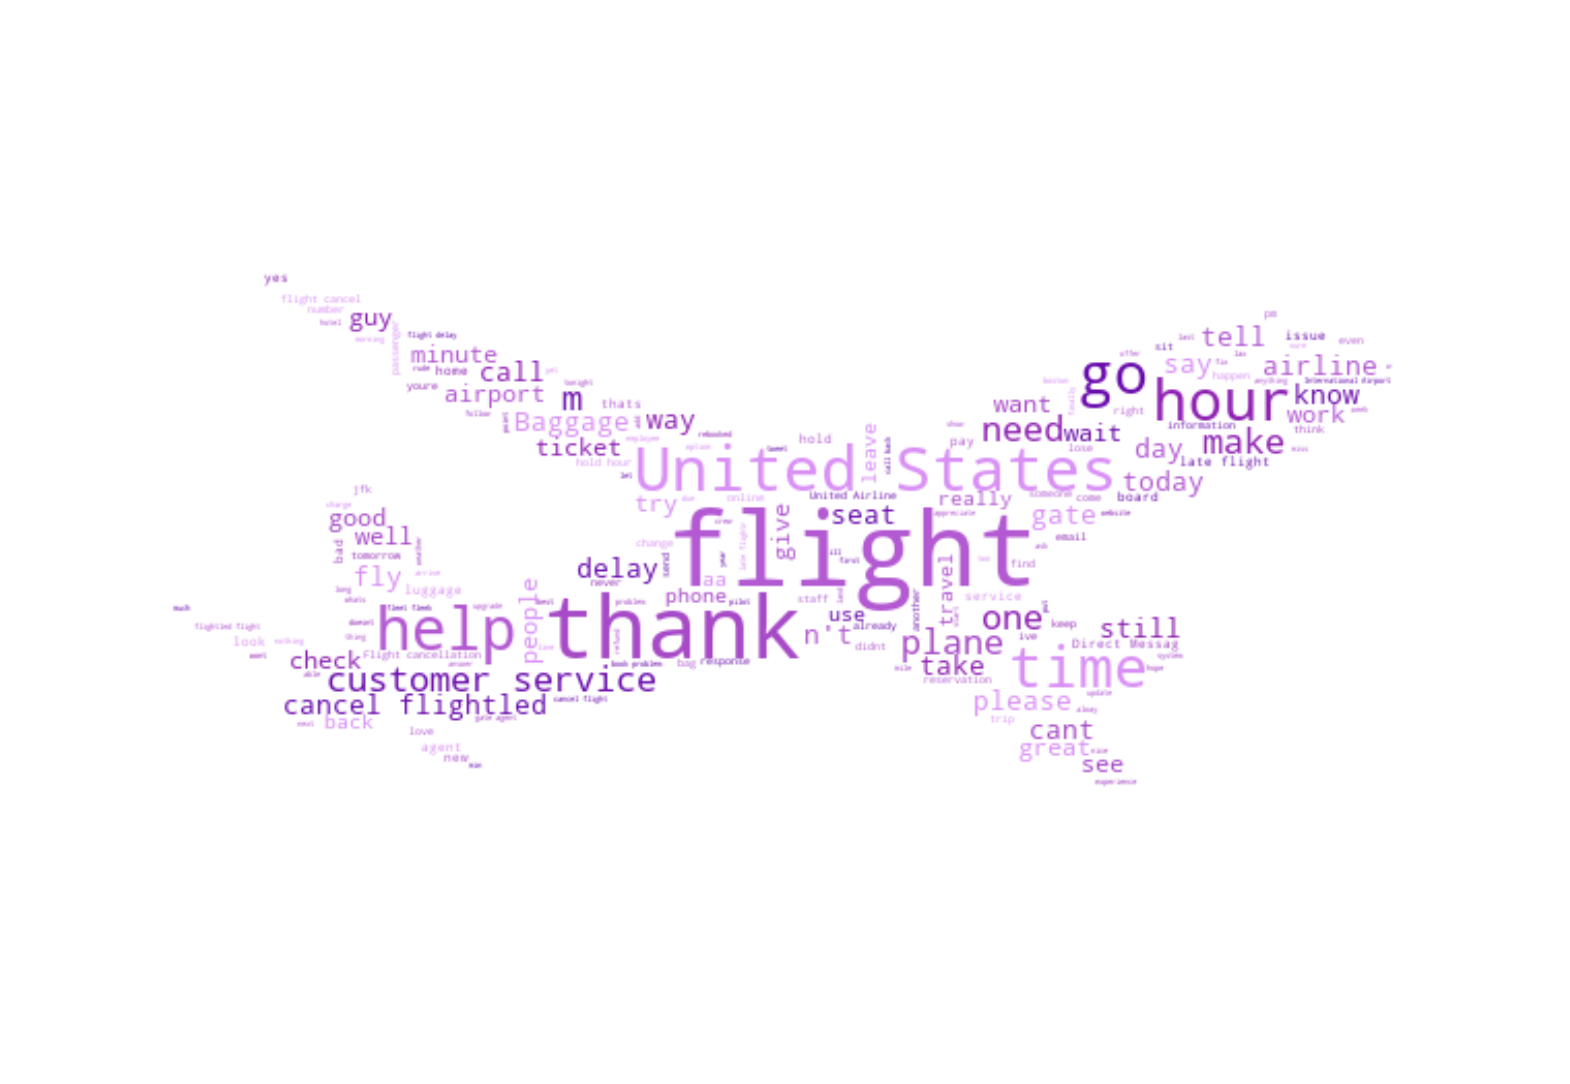

In [84]:
# Import necessary libraries
import numpy as np
from PIL import Image
from io import BytesIO
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# URL of the plant-shaped mask image
url = r"https://i.pinimg.com/originals/8e/7b/75/8e7b7502d8f5d3ecc3d2b9dcec85dfc7.jpg"

# Download the image from the URL
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Convert the image to a NumPy array
mask = np.array(image)

palette = ["#6A0DAD", "#A74AC7", "#D990F5", "#B35AD2", "#8E22B3"]

# Create a custom colormap from the coffee-themed colors
cmap = ListedColormap(palette)
# Create a WordCloud object with the plant-shaped mask and increased font size
wc = WordCloud(mask=mask,background_color='white',colormap=cmap).generate(processed_text)  # Adjust font_size as needed

# Display the word cloud
plt.figure(figsize=(20, 30))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

# Increase the maximum font size
plt.rcParams.update({'font.size': 50})

plt.show()


# Check the text polarity

In [61]:
# cover the col to text 
from textblob import TextBlob
valence = TextBlob(processed_text)
valence.sentiment

Sentiment(polarity=0.0979171924143831, subjectivity=0.499150226602535)

the result of the textblob obtain that the sentiment expressed in the text is slightly positive and somewhat subjective.

# Split the data

In [79]:
X = tweets.text
y = tweets.airline_sentiment

In [80]:
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=53)

# Vectorization

In [81]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
# Create DataFrame from CountVectorizer transformed data
count_train = count_vec.fit_transform(X_train)
count_test = count_vec.transform(X_test)
count_df = pd.DataFrame(count_train.A, columns=count_vec.get_feature_names_out())
count_df.head()

,aa,aaaand,aaba,aadavantage,aadfw,aadv,aadvantage,aal,aampc,aano,...,zambia,zccu,zero,zigzag,zip,zipper,zone,zoom,zurich,zurichnew
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Vectorization and classifier pipelines

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Define a pipeline
pipeline_log = Pipeline([
    ('count_vec', CountVectorizer()),
    ('classifier', LogisticRegression())
])

# Define the parameters you want to tune
parameters = {
    'count_vec__ngram_range': [(1, 1), (1, 2)],  # Tune the ngram range
    'classifier__C': [0.1, 1, 10],  # Tune the regularization parameter for Logistic Regression
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline_log, parameters, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Evaluate the model
accuracy = grid_search.score(X_test, y_test)
print("Accuracy:", accuracy)


Best parameters: {'classifier__C': 1, 'count_vec__ngram_range': (1, 2)}
Accuracy: 0.7891621129326047


In [83]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Define a pipeline
pipeline = Pipeline([
    ('tfidf_vec', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

# Define the parameters you want to tune
parameters = {
    'tfidf_vec__ngram_range': [(1, 1), (1, 2)],  # Tune the ngram range
    'classifier__C': [0.1, 1, 10],  # Tune the regularization parameter for Logistic Regression
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Evaluate the model
accuracy = grid_search.score(X_test, y_test)
print("Accuracy:", accuracy)


Best parameters: {'classifier__C': 10, 'tfidf_vec__ngram_range': (1, 2)}
Accuracy: 0.7802823315118397


# Probality for each class

In [69]:
y.unique() 

(array([1, 2, 0]), array([1, 2, 0]))

In [68]:
# Fit the pipeline with training data before predicting
pipeline_log.fit(X_train, y_train)

# Get the predicted probabilities for each class on test data
y_pred_probs = pipeline_log.predict_proba(X_test)

# Define class labels with corresponding sentiments
class_labels = {
    0: 'negative',
    1: 'neutral',
    2: 'positive'
}

# Create a DataFrame to store the predicted probabilities
df_pred_probs = pd.DataFrame(y_pred_probs, columns=[class_labels[i] for i in range(len(class_labels))])

df_pred_probs

,negative,neutral,positive
0,0.282857,0.614609,0.102533
1,0.930852,0.067183,0.001965
2,0.054567,0.060742,0.884691
3,0.665579,0.146875,0.187545
4,0.059833,0.864196,0.075971
...,...,...,...
4387,0.692545,0.086059,0.221396
4388,0.978001,0.014010,0.007990
4389,0.980272,0.016992,0.002736
4390,0.074096,0.123442,0.802462


## Overall probality for every class

In [192]:
# Calculate the mean probability for each class
class_probabilities = df_pred_probs.mean()

# Print the mean probabilities
print(class_probabilities)


negative    0.621557
neutral     0.218791
positive    0.159652
dtype: float64


In [67]:
import warnings
warnings.filterwarnings('ignore') 